<a href="https://colab.research.google.com/github/priyanshuuusaini/CODSOFT/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Explore the Datase**

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv("creditcard.csv")
# Display class distribution
print("Class distribution:\n", data['Class'].value_counts())

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


**Preprocess and Normaliz Data**

In [16]:
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
# Check if 'Time' column exists before dropping
if 'Time' in data.columns:
    data.drop(columns=['Time'], inplace=True)

**Handle Class Imbalance**

In [17]:
from imblearn.over_sampling import SMOTE
# Drop rows with NaN in the 'Class' column
data.dropna(subset=['Class'], inplace=True)
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

**Train-Test Split**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

**Train** **Model**

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**Evaluate The Model**

In [20]:
from sklearn.metrics import classification_report
# Make predictions
y_pred = logistic_model.predict(X_test)
# Print performance metrics
print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



**Visualize Confusion Matrix**

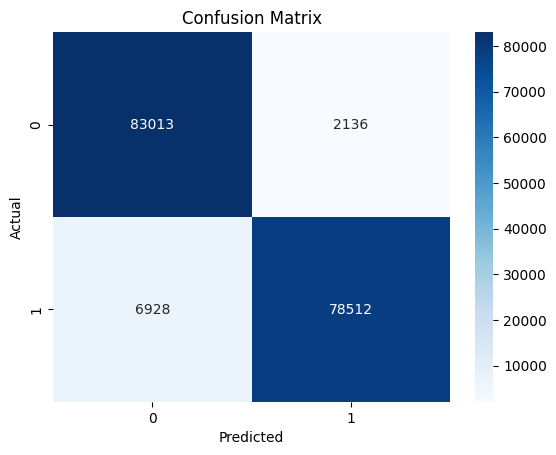

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()